### Image Classification with CNN

The purpose of our project is to develop a Convolutional Neural Network (CNN) to classify images. We will be using the TensorFlow package and following similar steps in MIT's Deep Learning Lab.

__Methodology__:
1. Load the data and flatten the input to feed into the model using tf.keras.layers.Flatten()
2. Compile the model using model.compile() 
3. Train the model with the training data and training labels using model.fit()
4. Evaluate the model with the test dataset and print a few of the test image labels with predictions to test accuracy

__CIFAR-10 Data__:

Data set retrieved from Keras package. The CIFAR-10 data set consists of 60,000 color images in 10 classes. The data set contains 50,000 training images and 10,000 test images. 

Image Classes:
* Airplane
* Automobile
* Bird
* Cat
* Deer
* Dog
* Frog
* Horse
* Ship
* Truck


Relevant data set links:  
https://keras.io/datasets/  
https://www.cs.toronto.edu/~kriz/cifar.html



__Results__:   
A model with epoch of 10 and a batch size of 64 with a test loss of 1.5843.

### 1. Loading CIFAR-10 Data

In [1]:
import tensorflow as tf 
import mitdeeplearning as mdl
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
np.shape(x_train)

(50000, 32, 32, 3)

There are 50,000 32x32 colored images in the training set.

Let's visualize a few of the training images with corresponding training labels below.

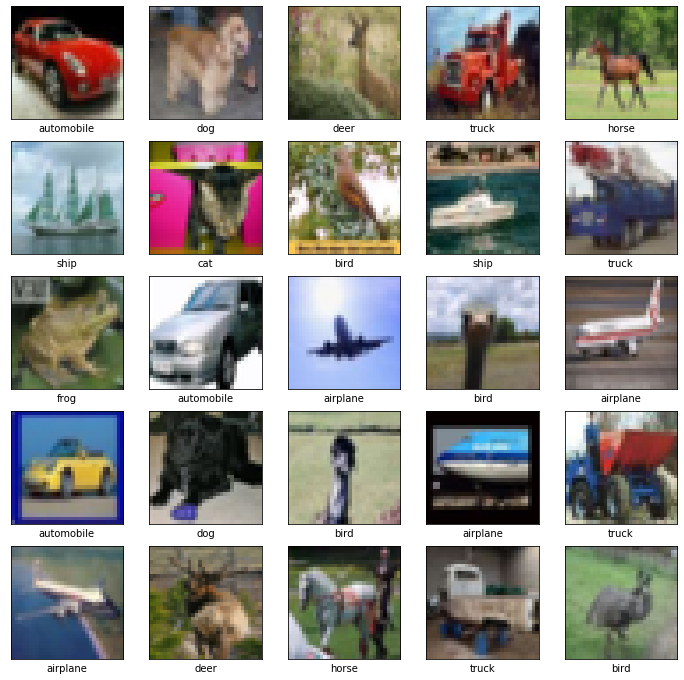

In [4]:
""" The training and testing labels are numeric so we will need to
pair them with a class_names vector """

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
               'frog', 'horse', 'ship', 'truck']

# Plot 25 random images from the training set with labels
random_inds = np.random.choice(50000,25)
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    image_ind = random_inds[i]
    plt.imshow(x_train[image_ind])
    plt.xlabel(class_names[y_train[image_ind][0]])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.show()

**Noramlize training images and testing images**

In [5]:
train_images = (x_train/255.).astype(np.float32)
train_labels = y_train
test_images = (x_test/255.).astype(np.float32)
test_labels = y_test

### 2. Compiling the Model 

In [6]:
def build_cnn_model():
    
    cnn_model = tf.keras.Sequential([

        # Defining the first convolutional layer
        tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32, activation=tf.nn.relu, input_shape=(32, 32, 3)), 

        # Defining the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # Defining the second convolutional layer
        tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, activation=tf.nn.relu),

        # Defining the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
             
        # Flattening image and label vectors
        tf.keras.layers.Flatten(),
        
        # Defining the last Dense layer to output the classification probabilities
        tf.keras.layers.Dense(64, activation=tf.nn.relu),

        # Defining Dense layer to output classification probabilities
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()

In [7]:
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])

# Print the summary of the layers in the model
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                147520    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

#### Compiling the model with the parameters below.

- Adam optimizer   
- Learning rate of .001      
- Sparse Categorical Crossentropy Loss   

In [18]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_crossentropy'])

### 3. Training the Model 

In [19]:
BATCH_SIZE=64
EPOCHS=10

modfit=cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS,
          validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 20s 391us/sample - loss: 0.3894 - sparse_categorical_crossentropy: 0.3894 - val_loss: 1.0823 - val_sparse_categorical_crossentropy: 1.0823
Epoch 2/10
50000/50000 [==============================] - 19s 372us/sample - loss: 0.3628 - sparse_categorical_crossentropy: 0.3628 - val_loss: 1.1945 - val_sparse_categorical_crossentropy: 1.1945
Epoch 3/10
50000/50000 [==============================] - 19s 380us/sample - loss: 0.3376 - sparse_categorical_crossentropy: 0.3377 - val_loss: 1.1977 - val_sparse_categorical_crossentropy: 1.1977
Epoch 4/10
50000/50000 [==============================] - 19s 384us/sample - loss: 0.3162 - sparse_categorical_crossentropy: 0.3162 - val_loss: 1.2850 - val_sparse_categorical_crossentropy: 1.2850
Epoch 5/10
50000/50000 [==============================] - 19s 373us/sample - loss: 0.2988 - sparse_categorical_crossentropy: 0.2988 - val_loss: 1.3134 - val_spars

### 4. Evaluate the Model

**Calculating the Test Loss**

In [30]:
test_loss = cnn_model.evaluate(x=test_images, y=test_labels)

10000/10000 [==============================] - 1s 148us/sample - loss: 1.5843 - sparse_categorical_crossentropy: 1.5843


[1.5843368148803711, 1.5843371]

**Plotting Test and Training Loss**

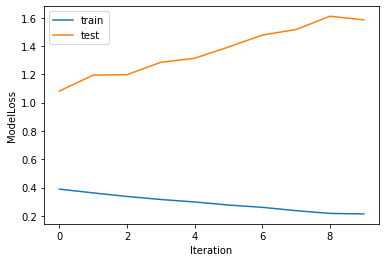

In [32]:
plt.plot(modfit.history['loss'])
plt.plot(modfit.history['val_loss'])
plt.ylabel('ModelLoss')
plt.xlabel('Iteration')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

It looks like the loss for the test and training data set declines after epoch equals to 8.

**Predictions**   
Let's make a few predictions and check the test labels to see if the predictions are correct.

Note, the model can be very confident with high prediction probabilities even for incorrect predictions. 

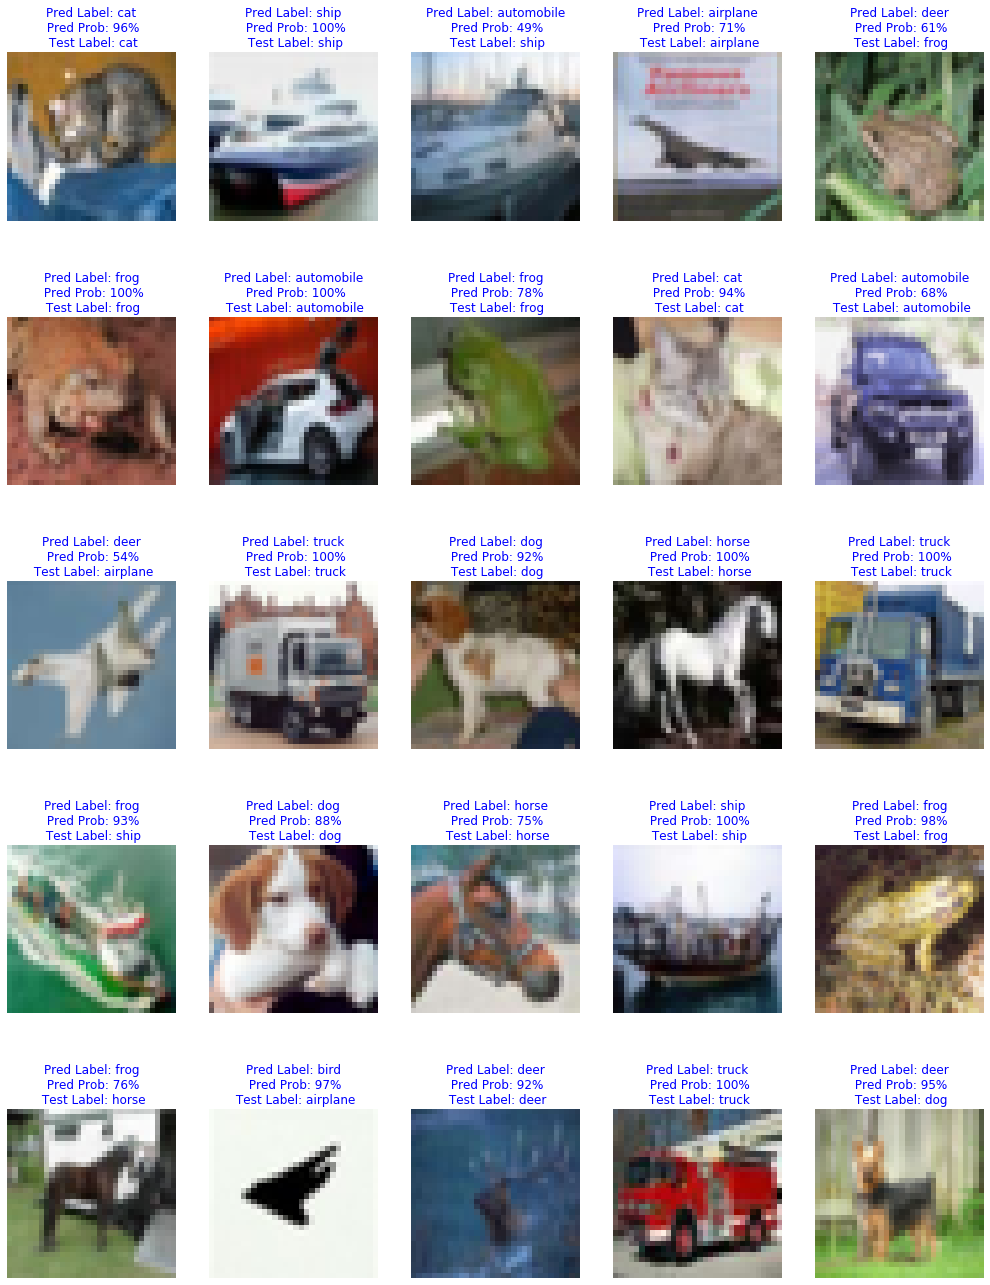

In [33]:
test_images=np.reshape(test_images, (10000,32,32,3))

# predictions on test data
predictions = cnn_model.predict(test_images)
prediction = np.argmax(predictions, axis=1)

# the probability of predictions
prediction_probs = np.max(predictions, axis=1)*100

num_rows = 6
num_cols = 6
plt.figure(figsize=(3*num_cols-.5, 4*num_rows-.5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_images[i])
    plt.title("Pred Label: {}\n Pred Prob: {:.0f}%\n Test Label: {}".format(
    class_names[prediction[i]], prediction_probs[i], class_names[test_labels[i][0]]), color='blue')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.axis(False)
plt.show()